## EDA

In [66]:
# Step 1: Importing libraries and loading the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_data.csv' with the actual file path)
data = pd.read_csv("/home/sebastian/Desktop/AICUP-2024-Power_Prediciton/dataset/36_TrainingData_raw/L1_Train.csv")

In [67]:
# Step 2: Basic Overview and Data Checks
# Inspect the first few rows
print(data.head())

# Check for missing values and data types
print(data.info())

# Summary statistics
print(data.describe())

   LocationCode                 DateTime  WindSpeed(m/s)  Pressure(hpa)  \
0             1  2024-01-01 06:31:08.000             0.0        1016.50   
1             1  2024-01-01 06:32:08.000             0.0        1016.53   
2             1  2024-01-01 06:33:08.000             0.0        1016.57   
3             1  2024-01-01 06:34:08.000             0.0        1016.58   
4             1  2024-01-01 06:35:08.000             0.0        1016.59   

   Temperature(°C)  Humidity(%)  Sunlight(Lux)  Power(mW)  
0             17.5         86.8          25.00        0.0  
1             17.5         86.7          28.33        0.0  
2             17.5         86.7          32.50        0.0  
3             17.5         86.7          39.17        0.0  
4             17.5         86.7          45.83        0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101673 entries, 0 to 101672
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           ----------

In [68]:
null_counts = data.isnull().sum()
print("Null counts per column:")
print(null_counts)

Null counts per column:
LocationCode       0
DateTime           0
WindSpeed(m/s)     0
Pressure(hpa)      0
Temperature(°C)    0
Humidity(%)        0
Sunlight(Lux)      0
Power(mW)          0
dtype: int64


In [69]:
# Convert 'DateTime' to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['DateTime']

0        2024-01-01 06:31:08
1        2024-01-01 06:32:08
2        2024-01-01 06:33:08
3        2024-01-01 06:34:08
4        2024-01-01 06:35:08
                 ...        
101668   2024-07-24 18:17:07
101669   2024-07-24 18:18:07
101670   2024-07-24 18:19:07
101671   2024-07-24 18:20:07
101672   2024-07-24 18:21:07
Name: DateTime, Length: 101673, dtype: datetime64[ns]

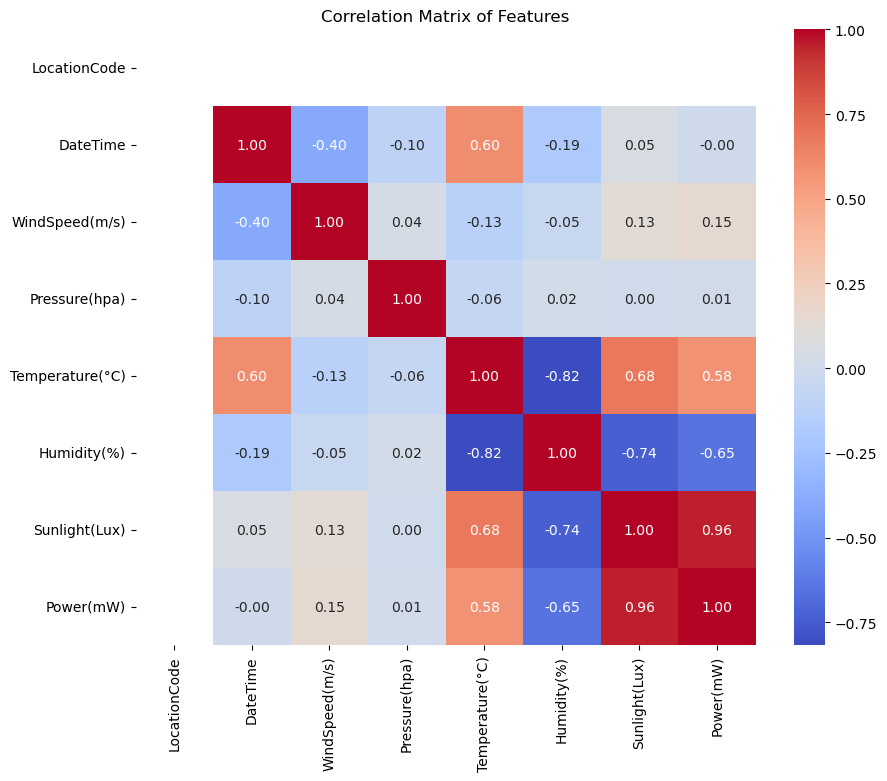

In [70]:
# Compute pairwise correlations
correlation_matrix = data.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

## normalize data

In [71]:
from sklearn.preprocessing import MinMaxScaler

# Selecting numerical columns for normalization
normalize_features = ['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)']
data_numerical = data[normalize_features]

scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data_numerical)

# Creating a DataFrame with normalized data
data_normalized = pd.DataFrame(data_normalized, columns=normalize_features)

# Concatenate normalized data with other non-numerical columns if needed
data_normalized = pd.concat([data[['LocationCode', 'DateTime', 'Power(mW)']], data_normalized], axis=1)

print(data_normalized.head())

   LocationCode            DateTime  Power(mW)  WindSpeed(m/s)  Pressure(hpa)  \
0             1 2024-01-01 06:31:08        0.0             0.0       0.007243   
1             1 2024-01-01 06:32:08        0.0             0.0       0.007246   
2             1 2024-01-01 06:33:08        0.0             0.0       0.007251   
3             1 2024-01-01 06:34:08        0.0             0.0       0.007253   
4             1 2024-01-01 06:35:08        0.0             0.0       0.007254   

   Temperature(°C)  Humidity(%)  Sunlight(Lux)  
0         0.259197     0.241551       0.000042  
1         0.259197     0.241195       0.000071  
2         0.259197     0.241195       0.000106  
3         0.259197     0.241195       0.000163  
4         0.259197     0.241195       0.000219  


In [72]:
# Set DateTime as the index for resampling
data.set_index('DateTime', inplace=True)

# Resample data in 10-minute intervals using mean
# 'LocationCode' is a non-numeric column, so we need to handle it separately if we have multiple locations.
data_resampled = data.resample('10min').mean()

data_resampled = data_resampled.between_time("07:00", "17:00")

# Reset index if you want DateTime as a regular column
data_resampled.reset_index(inplace=True)

data_resampled.dropna(inplace=True)

# Save the resampled data to a new CSV file
# data_resampled.to_csv('/home/sebastian/Desktop/AI_CUP_2024/36_TrainingData_process/L1_Train_resampled.csv', index=False)

print(data_resampled.head())

             DateTime  LocationCode  WindSpeed(m/s)  Pressure(hpa)  \
0 2024-01-01 07:00:00           1.0         0.00000       1016.730   
1 2024-01-01 07:10:00           1.0         0.00000       1016.774   
2 2024-01-01 07:20:00           1.0         0.68193       1016.922   
3 2024-01-01 07:30:00           1.0         0.60737       1016.992   
4 2024-01-01 07:40:00           1.0         0.00000       1017.094   

   Temperature(°C)  Humidity(%)  Sunlight(Lux)  Power(mW)  
0            17.50        86.99        470.834      0.083  
1            17.57        86.97        659.667      0.139  
2            17.63        86.18        889.666      0.247  
3            17.74        85.41       1263.833      0.447  
4            17.90        85.41       2136.833      1.129  


In [73]:
print(data_resampled.describe())

                            DateTime  LocationCode  WindSpeed(m/s)  \
count                           8206        8206.0     8206.000000   
mean   2024-04-07 11:48:57.411650048           1.0        0.367933   
min              2024-01-01 07:00:00           1.0        0.000000   
25%              2024-02-07 14:12:30           1.0        0.000000   
50%              2024-04-03 07:45:00           1.0        0.000000   
75%              2024-05-31 12:57:30           1.0        0.327500   
max              2024-07-24 17:00:00           1.0        4.502000   
std                              NaN           0.0        0.763933   

       Pressure(hpa)  Temperature(°C)  Humidity(%)  Sunlight(Lux)    Power(mW)  
count    8206.000000      8206.000000  8206.000000    8206.000000  8206.000000  
mean     1009.494640        31.642913    67.547978   32181.027374   358.225244  
min       958.566667        10.870000    19.150000     125.664000     0.010000  
25%      1003.745667        23.031591    43.4

In [74]:
# Check missing values in each column
print(data_resampled.isnull().sum())


DateTime           0
LocationCode       0
WindSpeed(m/s)     0
Pressure(hpa)      0
Temperature(°C)    0
Humidity(%)        0
Sunlight(Lux)      0
Power(mW)          0
dtype: int64


In [ ]:
data_resampled['Date'] = data_resampled['DateTime'].dt.date
data_resampled = data_resampled.groupby('Date').filter(lambda x: len(x)>=60)
data_resampled = data_resampled.drop(columns=['Date'])

# data_resampled.to_csv('./test.csv',index=False)
data_resampled

,DateTime,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,2024-01-01 07:00:00,1.0,0.00000,1016.730000,17.50,86.99,470.834000,0.083000
1,2024-01-01 07:10:00,1.0,0.00000,1016.774000,17.57,86.97,659.667000,0.139000
2,2024-01-01 07:20:00,1.0,0.68193,1016.922000,17.63,86.18,889.666000,0.247000
3,2024-01-01 07:30:00,1.0,0.60737,1016.992000,17.74,85.41,1263.833000,0.447000
4,2024-01-01 07:40:00,1.0,0.00000,1017.094000,17.90,85.41,2136.833000,1.129000
...,...,...,...,...,...,...,...,...
12561,2024-07-24 16:20:00,1.0,0.00000,959.121000,25.10,100.00,758.085000,0.106000
12562,2024-07-24 16:30:00,1.0,0.00000,959.102000,25.10,100.00,507.167000,0.054000
12563,2024-07-24 16:40:00,1.0,0.00000,958.566667,25.10,100.00,369.998889,0.025556
12564,2024-07-24 16:50:00,1.0,0.00000,958.926000,25.16,100.00,336.249000,0.020000


In [76]:
# # Step 1: Convert DateTime column to just the date for grouping
# data_resampled['Date'] = data_resampled['DateTime'].dt.date
# data_resampled = data_resampled.groupby('Date').filter(lambda x: len(x) >= 15)
# data_resampled.to_csv('./test.csv')

In [81]:
data_resampled.groupby('Date').size()

Date
2024-01-01    61
2024-01-02    61
2024-01-03    61
2024-01-04    61
2024-01-05    61
              ..
2024-07-12    61
2024-07-14    61
2024-07-16    61
2024-07-23    61
2024-07-24    61
Length: 106, dtype: int64